# Industrialized EDA for ACRAS (Real Data)

This notebook implements a structured, "industrialized" Exploratory Data Analysis (EDA) pipeline for the Agentic Credit Risk Assessment System (ACRAS). 

**Objectives:**
1.  **Strict Typing**: Ensure all variables are correctly cast.
2.  **Comprehensive Analysis**: Cover Numerical, Categorical, Boolean, High-Cardinality, and Date/Time data.
3.  **Visualizations**: Produce publication-ready plots.
4.  **Reproducibility**: Use fixed seeds and standard data loading from artifacts.
5.  **Real Data Focus**: Analyzes pure financial/risk data without synthetic text enrichment.


In [1]:
# 1. Setup & Imports
import sys
import os
from pathlib import Path

# Add project root to path for imports
project_root = Path(os.getcwd()).parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns", None)


## 2. Data Loading & Variable Typing


In [ ]:
# Load processed data from artifacts
train_path = Path("artifacts/data_ingestion/train.csv")
if train_path.exists():
    print(f"Loading data from {train_path}")
    df = pd.read_csv(train_path)
    print(f"Loaded {len(df)} samples.")
    print("Columns:", df.columns.tolist())
else:
    # Fallback for notebook running in different cwd
    train_path = Path("../artifacts/data_ingestion/train.csv") 
    if train_path.exists():
         print(f"Loading data from {train_path}")
         df = pd.read_csv(train_path)
    else:
        raise FileNotFoundError("Artifact not found. Please run 'uv run dvc repro'.")

# Enforce Types
def enforce_types(df: pd.DataFrame) -> pd.DataFrame:
    # Date/Time
    # Real data might calculate dates or just have years. 
    # Current schema has 'ano' (Year) and 'years_operating'.
    
    # Categorical
    # Real data has fewer categoricals unless mapped.
    # 'industry_sector' was synthetic. We might have 'sector_risk_score' which is numerical.
    return df

df = enforce_types(df)
print(df.info())


Loading data from ..\artifacts\data_ingestion\train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_empresa           350 non-null    int64  
 1   ano                  350 non-null    int64  
 2   ingresos             350 non-null    float64
 3   ebitda               350 non-null    float64
 4   activos_totales      350 non-null    float64
 5   pasivos_totales      350 non-null    float64
 6   patrimonio           350 non-null    float64
 7   caja                 350 non-null    float64
 8   gastos_intereses     350 non-null    float64
 9   cuentas_cobrar       350 non-null    float64
 10  inventario           350 non-null    float64
 11  cuentas_pagar        350 non-null    float64
 12  sector_risk_score    350 non-null    float64
 13  years_operating      350 non-null    float64
 14  ratio_mora           350 non-null 

## 3. Numerical EDA


Numerical Statistics:


,ebitda_margin,debt_to_equity,current_ratio,years_operating,sector_risk_score,ratio_mora,ratio_utilizacion,score_buro,default_probability
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.116541,0.889104,4.167337,12.777143,0.458587,0.250100,0.489955,648.356193,0.156794
std,0.027036,0.311465,1.345978,6.849302,0.292016,0.066028,0.119504,43.118585,0.128230
min,0.017413,0.448792,1.283424,1.000000,0.003495,0.023654,0.121825,530.668242,0.005214
25%,0.100465,0.664898,3.189029,7.000000,0.194893,0.204825,0.405648,620.950510,0.062689
50%,0.117921,0.841770,4.001854,13.000000,0.424303,0.247842,0.490011,650.208142,0.120299
75%,0.134082,1.053028,5.012773,19.000000,0.691578,0.294877,0.570506,677.364343,0.213778
max,0.180780,2.611258,8.409622,24.000000,0.999286,0.459647,0.829878,775.196056,0.649505



Skewness:
 ebitda_margin         -0.398390
debt_to_equity         1.632436
current_ratio          0.660488
years_operating       -0.041541
sector_risk_score      0.127260
ratio_mora             0.029375
ratio_utilizacion     -0.146307
score_buro            -0.024455
default_probability    1.458142
dtype: float64


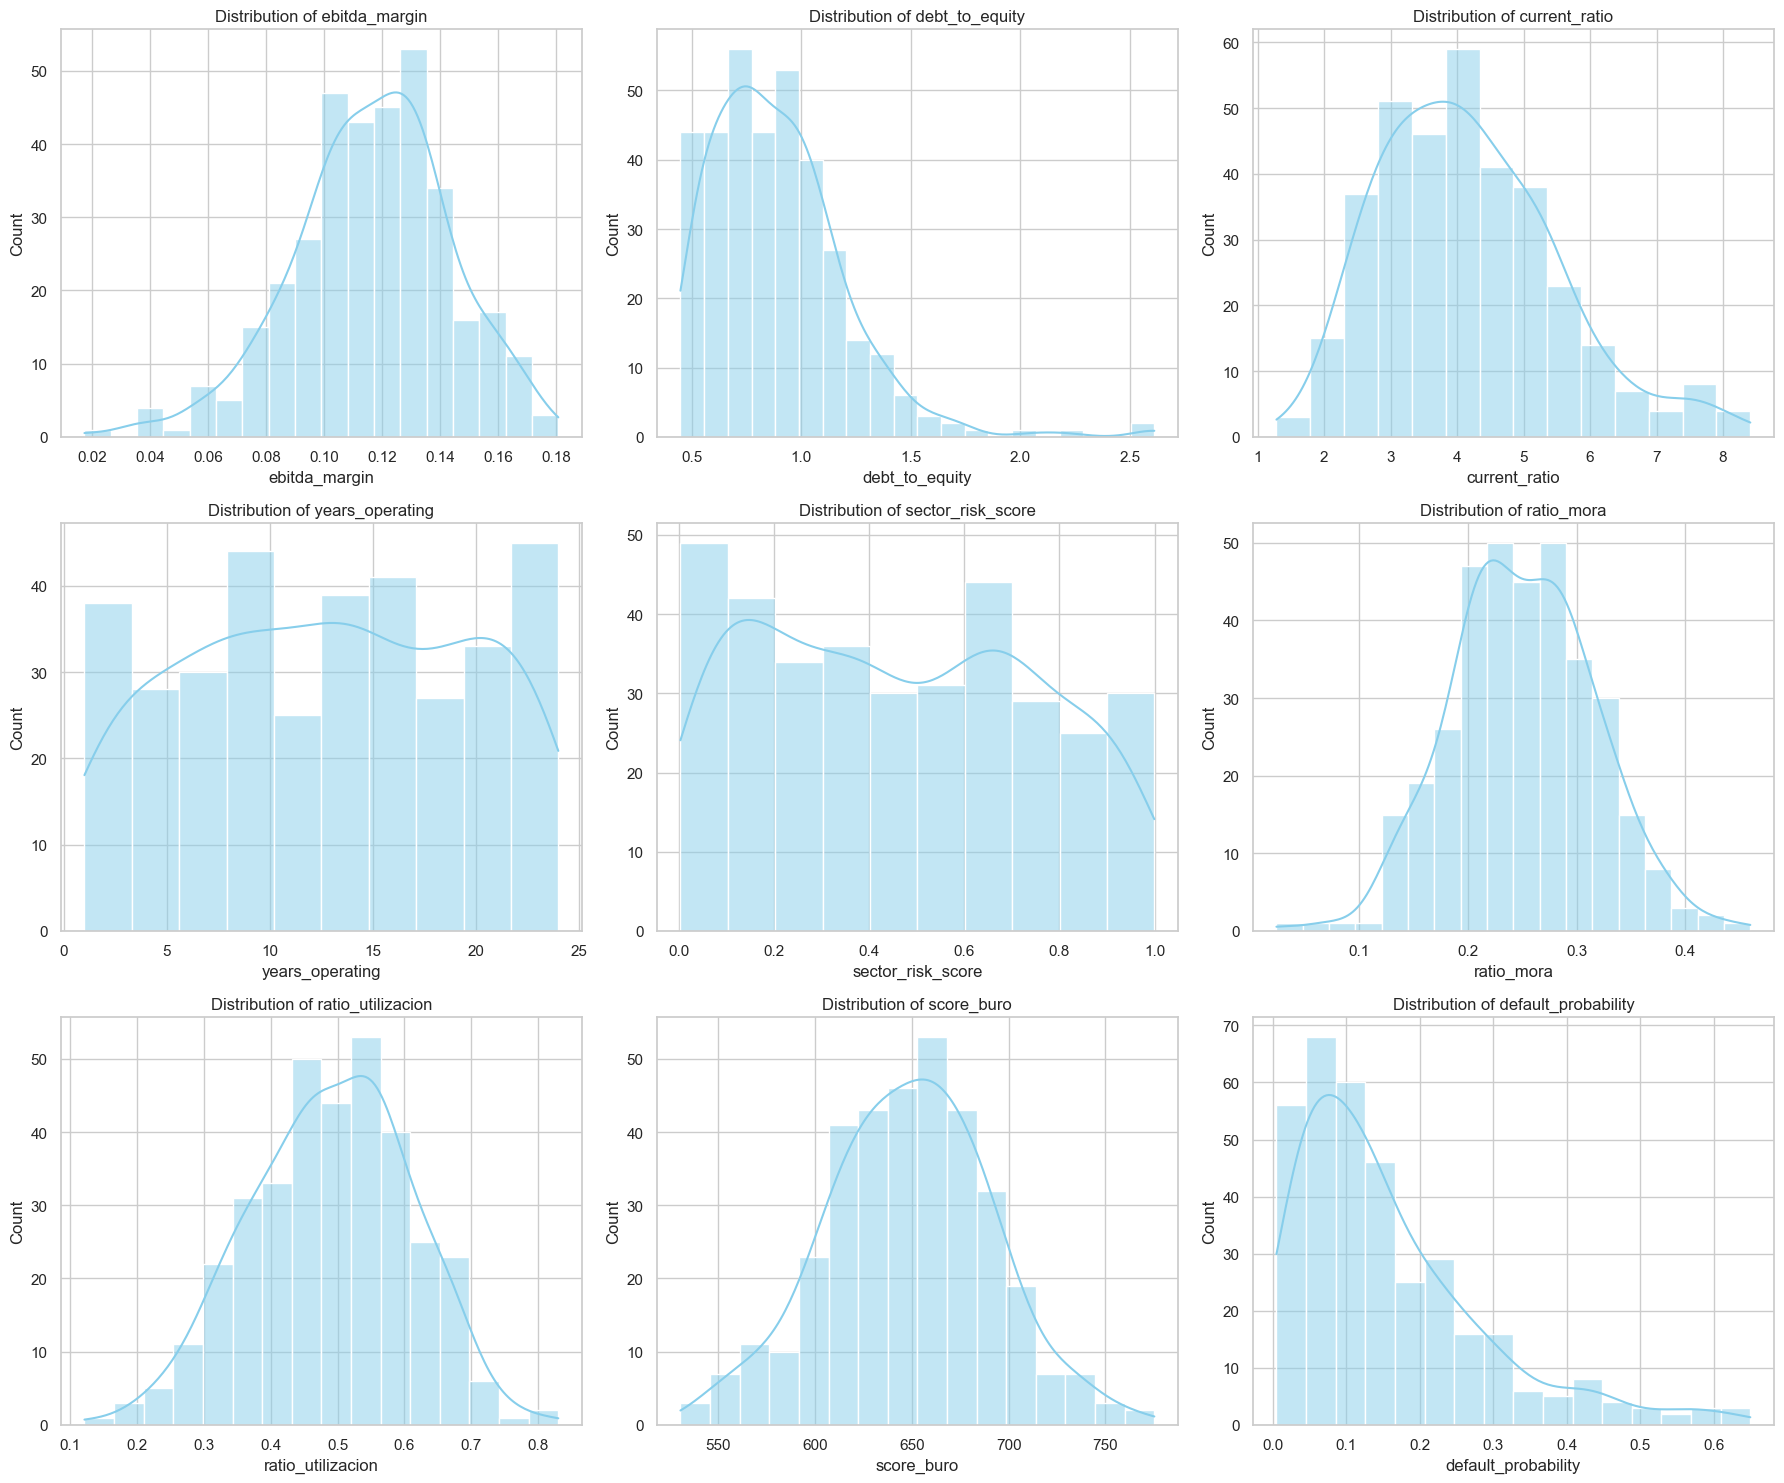

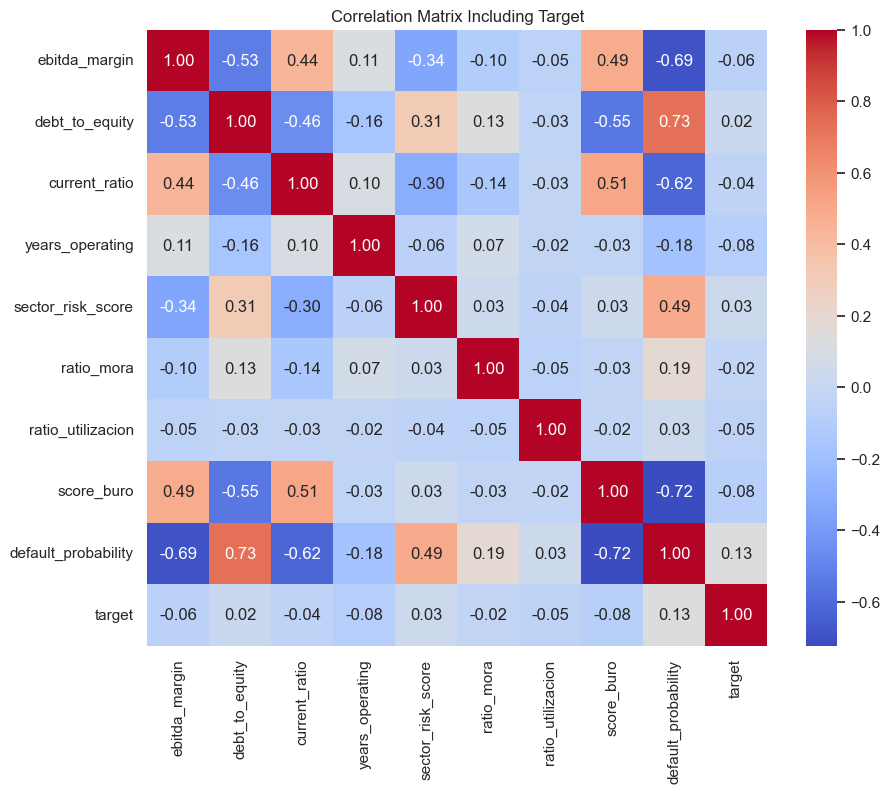

In [3]:
# Statistical Analysis
# Focus on Real Financial Ratios and Indicators
numerical_cols = [
    'revenue_growth', 'ebitda_margin', 'debt_to_equity', 'current_ratio', 
    'years_operating', 'sector_risk_score', 'ratio_mora', 'ratio_utilizacion',
    'score_buro', 'default_probability'
]
existing_cols = [col for col in numerical_cols if col in df.columns]

print("Numerical Statistics:")
display(df[existing_cols].describe())
print("\nSkewness:\n", df[existing_cols].skew())

# Graphical Analysis
if existing_cols:
    n_cols = 3
    n_rows = (len(existing_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(existing_cols):
        sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribution of {col}')
    
    # Hide unused axes
    for i in range(len(existing_cols), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_cols = existing_cols + ['target']
corr_cols = [c for c in corr_cols if c in df.columns]
corr = df[corr_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Including Target")
plt.show()


## 4. Categorical & Boolean EDA


In [4]:
# Check for any categorical or boolean columns
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

if cat_cols:
    print(f"Analysis of Categorical Columns: {cat_cols}")
    for col in cat_cols:
        print(f"\n--- {col} ---")
        print(df[col].value_counts(normalize=True))
        
        plt.figure(figsize=(8, 4))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.show()
else:
    print("No categorical columns found in the real dataset (purely numerical/financial).")



No categorical columns found in the real dataset (purely numerical/financial).


## 5. High-Cardinality EDA


In [5]:
high_card_cols = ['id_empresa']
high_card_cols = [c for c in high_card_cols if c in df.columns]

print("Unique Counts:")
print(df[high_card_cols].nunique())

# Check for duplicates in ID fields (Integrity Check)
if 'id_empresa' in df.columns:
    duplicates = df[df.duplicated(subset=['id_empresa'], keep=False)]
    print(f"\nDuplicate Company IDs found (Should be 0 after aggregation): {len(duplicates)}")


Unique Counts:
id_empresa    350
dtype: int64

Duplicate Company IDs found (Should be 0 after aggregation): 0


## 6. Advanced Financial Analysis (Real Data)


C:\Users\sebas\AppData\Local\Temp\ipykernel_8412\2874033841.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, ax=axes[i], palette='Set2')
C:\Users\sebas\AppData\Local\Temp\ipykernel_8412\2874033841.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, ax=axes[i], palette='Set2')
C:\Users\sebas\AppData\Local\Temp\ipykernel_8412\2874033841.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, ax=axes[i], palette='Set2')
C:\Users\sebas\AppData\Local\Temp\ipyker

C:\Users\sebas\AppData\Local\Temp\ipykernel_8412\2874033841.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, ax=axes[i], palette='Set2')


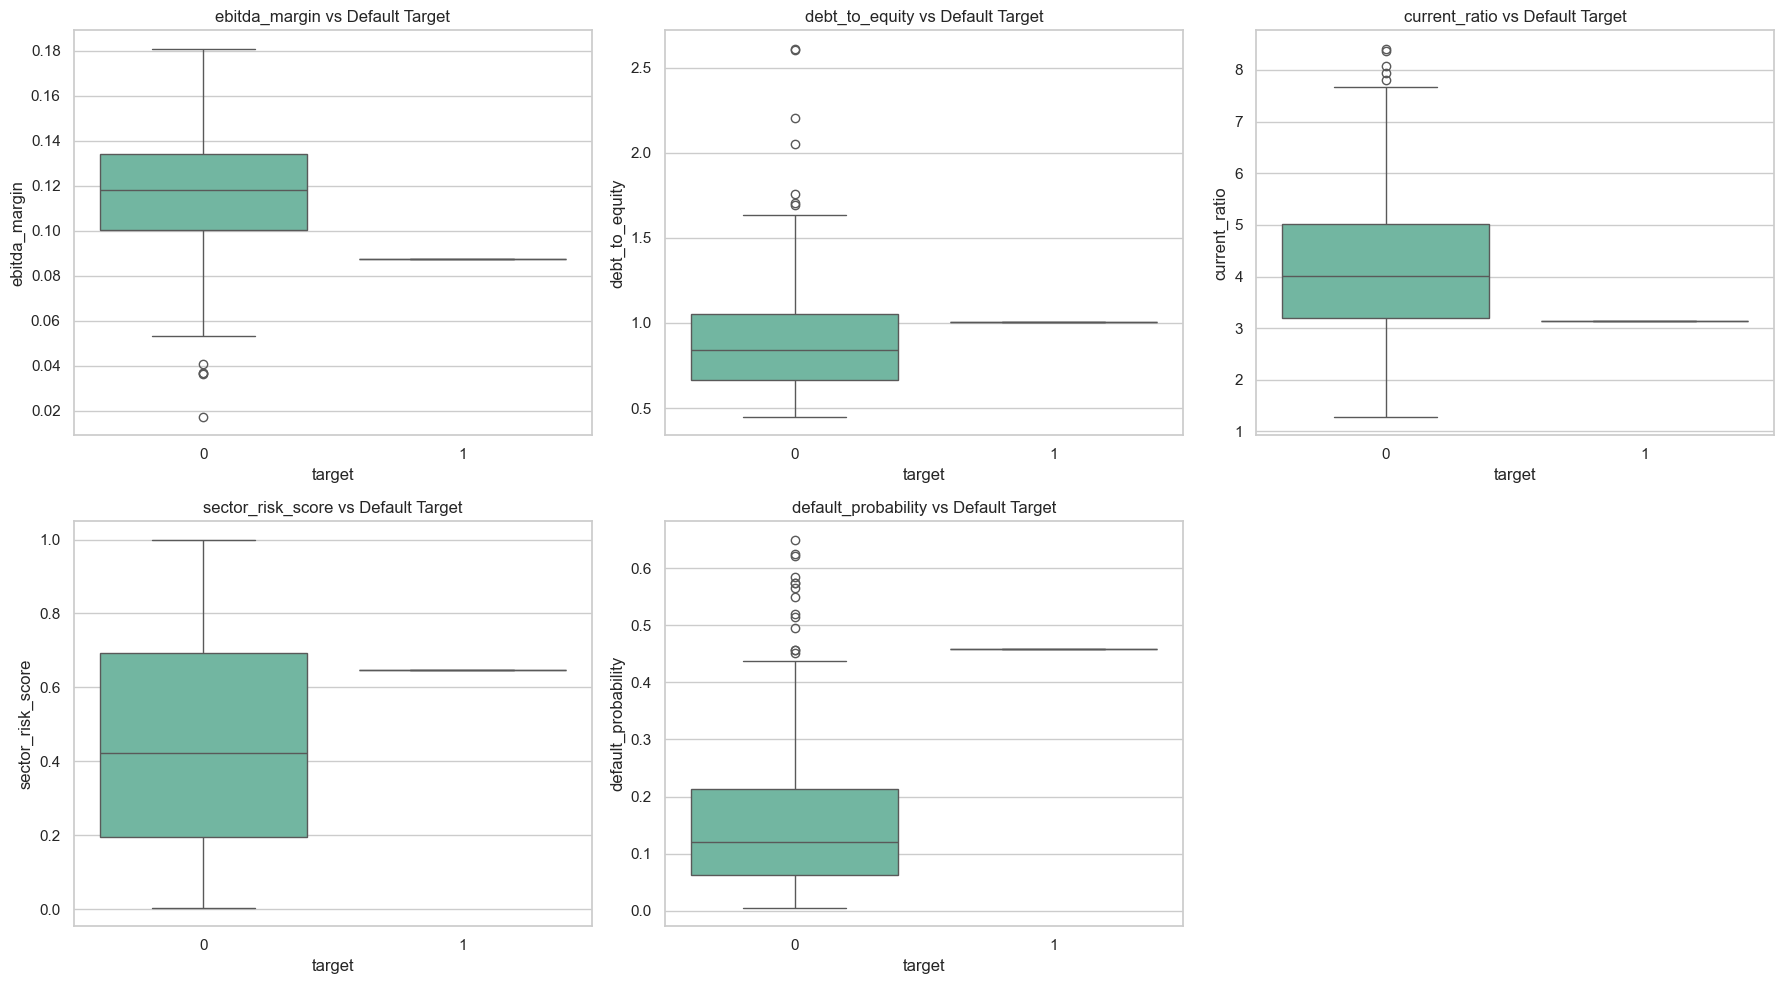


Top 10 Riskiest Companies (by PD):


,id_empresa,default_probability,ebitda_margin,debt_to_equity,current_ratio,sector_risk_score,default_probability
322,192,0.649505,0.056130,1.602412,1.519972,0.968555,0.649505
134,130,0.624206,0.056235,1.520366,2.284565,0.828123,0.624206
193,379,0.621539,0.059796,2.604951,1.473200,0.714837,0.621539
39,169,0.584574,0.017413,1.691212,2.500673,0.954568,0.584574
2,46,0.574349,0.036995,1.755324,2.292051,0.436667,0.574349
195,42,0.573052,0.072856,2.611258,2.798444,0.424979,0.573052
316,22,0.565238,0.036682,2.205575,2.416328,0.896997,0.565238
339,467,0.549023,0.053330,1.437767,2.307603,0.899636,0.549023
137,445,0.519712,0.036275,1.303731,2.677486,0.817424,0.519712
36,366,0.514557,0.040960,1.288610,1.950769,0.763688,0.514557


In [6]:
# Key Risk Indicators (KRI) Analysis
# Identify what drives default

kri_cols = ['revenue_growth', 'ebitda_margin', 'debt_to_equity', 'current_ratio', 'sector_risk_score', 'default_probability']
kri_cols = [col for col in kri_cols if col in df.columns]

if 'target' in df.columns and kri_cols:
    n_cols = 3
    n_rows = (len(kri_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(kri_cols):
        sns.boxplot(x='target', y=col, data=df, ax=axes[i], palette='Set2')
        axes[i].set_title(f'{col} vs Default Target')
        # If highly skewed, log scale might help, but keeping linear for now
    
    # Hide unused axes
    for i in range(len(kri_cols), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Target column not found or no KRI columns available.")

# Inspect Top Highest Risk Companies
if 'id_empresa' in df.columns and 'default_probability' in df.columns:
    print("\nTop 10 Riskiest Companies (by PD):")
    top_risk = df.nlargest(10, 'default_probability')[['id_empresa', 'default_probability'] + kri_cols]
    display(top_risk)



## 7. Date/Time EDA


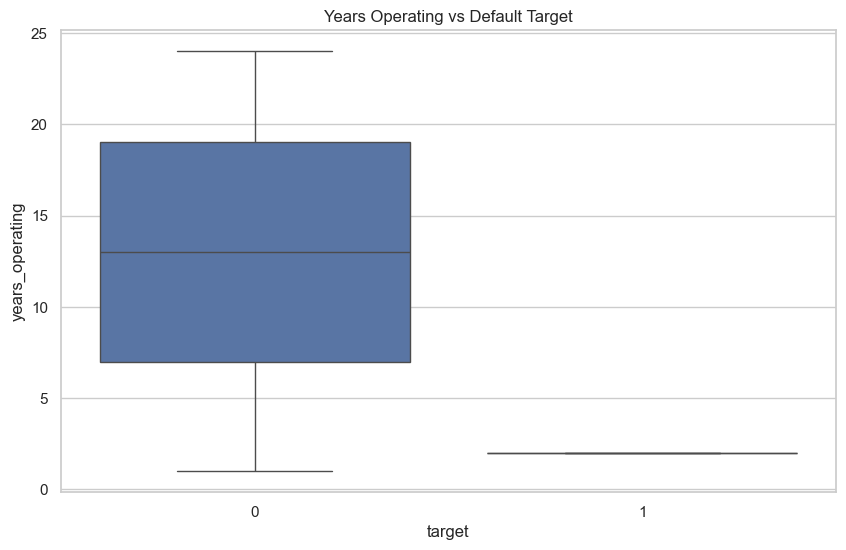


Year Distribution (Financial Snaphots):
ano
2023    350
Name: count, dtype: int64


In [7]:
# Relationship: Years Operating vs Target
if 'years_operating' in df.columns and 'target' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target', y='years_operating', data=df)
    plt.title("Years Operating vs Default Target")
    plt.show()
    
# Check 'ano' distribution (Should be latest years mostly)
if 'ano' in df.columns:
    print("\nYear Distribution (Financial Snaphots):")
    print(df['ano'].value_counts())

